## Implementing Lloyd's k-means algorithm from scratch

In this notebook, we implement Lloyd's k-means algorithm in 2D and test it on different types of data. In particular, we will construct examples where the algorithm gets stuck on local minima. 
 
*Copyright notice:* The implementation which we use is slightly similar to the one found here:
https://datasciencelab.wordpress.com/2013/12/12/clustering-with-k-means-in-python/

*For questions / bugs / suggestions, please contact me @ christoph.glanzer@ifor.math.ethz.ch*

We begin by loading some packages.

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib.pyplot import pause
from IPython.display import display, clear_output
from collections import defaultdict

The following function implements Lloyd's algorithm.

In [2]:
def k_means_lloyd(X, K, num_iter = 10, centers = None, plot = True):
    '''
    Implementation of Lloyd's algorithm.
    
        Parameters:
            X (np.ndarray): An array with mx2 entries where every row corresponds to a point,
            K (int): The number of clusters,
            num_iter (int): The number of iterations,
            centers (np.ndarray): A Kx2 array which, if provided, holds the initialization of the cluster centers,
            plot (bool): If true, generate a plot.
            
        Returns:
            centers (np.ndarray): An array with Kx2 entries where every row corresponds to a cluster center.
    '''
    
    # Initialize the cluster centers as a random sample from the data points unless centers are provided
    if centers is None:
        centers = X[random.sample(range(len(X)),K),]
    
    # Main for loop
    for i in range(num_iter):
        
        # Step 1 of Lloyd's algorithm:
        # Assign every point to its closest cluster
        clusters = defaultdict(list)
        for x in X:
            closest_center_index = np.argmin(np.linalg.norm(x-centers, axis = 1))
            clusters[closest_center_index].append(x)
        
        # Step 2 of Lloyd's algorithm:
        # Find new centers
        centers = []
        for k in sorted(clusters.keys()):
            centers.append(np.mean(clusters[k], axis=0))
        centers = np.array(centers)
        
        # Plot
        if plot:
            # Color-Map
            cmap = plt.cm.get_cmap(None,K)
            plt.clf()
            fig = plt.figure()
            plt.title("Iteration "+str(i+1))
            for l in range(K):
                plt.scatter(np.array(clusters[l])[:,0], np.array(clusters[l])[:,1], color = cmap(l), s = 5)
                plt.scatter(centers[l,0], centers[l,1], color = 'red', marker="X")
            fig.show()
            clear_output(wait=True)
            plt.pause(0.5)

    return centers

Next, we produce different types of data and test our implementation. We begin with random, **uniformly distributed** data points.

<Figure size 432x288 with 0 Axes>

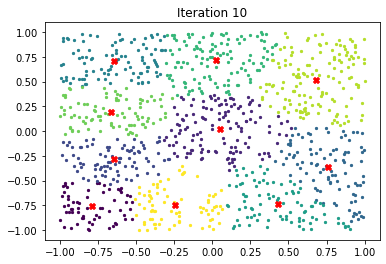

In [3]:
# Number of randomly generated points
N = 1000

# Number of clusters
K = 10

X = np.array([(random.uniform(-1, 1), random.uniform(-1, 1)) for i in range(N)])

# Run the algorithm
centers = k_means_lloyd(X, K)


Next, we try **Gaussian data**. Feel free to play around with the settings!

<Figure size 432x288 with 0 Axes>

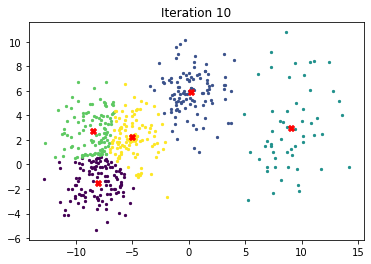

In [4]:
# Randomly select some center points
N = 500
K = 5
X = np.zeros((N,2))
xcenters = [random.uniform(-10,10) for i in range(K)]
ycenters = [random.uniform(-10,10) for i in range(K)]
sigmas = [random.uniform(1, 3) for i in range(K)]

# Partition the set {1,...,N} into K sets
partitionlimits = random.sample(range(1,N-1), K-1)
partitionlimits.append(0)
partitionlimits.append(N)
partitionlimits.sort()
for i in range(K): # Generate i-th cluster
    for j in range(partitionlimits[i], partitionlimits[i+1]):
        X[j,] = [random.gauss(xcenters[i], sigmas[i]), random.gauss(ycenters[i], sigmas[i])]

# Run the algorithm
centers = k_means_lloyd(X, K)

### Does it always converge to a global optimum?
Next, we consider the following data, where we provide specific starting points for the clusters which lead to a bad outcome: The algorithm will fail to converge in the sense that it gets "stuck" at a local optimum.

<Figure size 432x288 with 0 Axes>

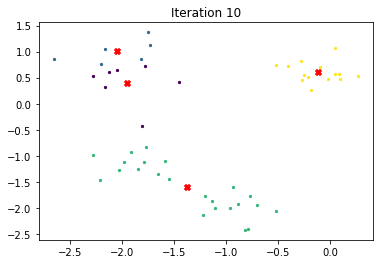

In [5]:
random.seed(50)
K = 4
N = 50
X = np.zeros((N,2))
xcenters = [-2,-1.75,-1,0]
ycenters = [0.75,-1,-2,0.5]
fixed_starting_points = np.array([[-2,0.75],[-2,0.76],[-1.87,-1.5],[0,0.5]])
sigmas = [0.25,0.25,0.25,0.25]
partitionlimits = [0,12,24,36,50]
for i in range(K):
    for j in range(partitionlimits[i], partitionlimits[i+1]):
        X[j,] = [random.gauss(xcenters[i], sigmas[i]), random.gauss(ycenters[i], sigmas[i])]
        
# Run the algorithm
centers = k_means_lloyd(X, K, centers=fixed_starting_points, num_iter=10)

**Note**: Obviously, the example above is very artificial. Nonetheless, this example shows that the algorithm should be executed multiple times with different (random) starting points. 

We run the algorithm once more on this artifical data but this time with random starting points. Alternatively, you could choose 4 random points from the data as starting points for the iteration.

The algorithm converges as intended.

<Figure size 432x288 with 0 Axes>

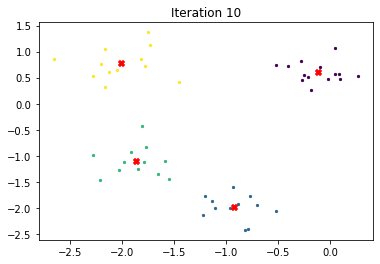

In [7]:
random.seed(12)
random_starting_points = np.array([(random.uniform(-2, 2), random.uniform(-2, 2)) for i in range(4)])
centers = k_means_lloyd(X, K, centers = random_starting_points, num_iter=10)